In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Set NLTK data path explicitly (critical for Colab/Jupyter)
nltk.data.path.append("/root/nltk_data")  # Or your custom path

# Download ALL required resources (even if they seem installed)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)  # Fixes LookupError

def clean_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters

    # Tokenize with punkt
    try:
        tokens = nltk.word_tokenize(text)
    except LookupError:
        nltk.download('punkt')
        tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    filtered = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(filtered)

# Load data and clean
df = pd.read_csv('WELFake_Dataset.csv')
df = df.dropna(subset=['text']).drop_duplicates(subset=['text'])
df['cleaned_text'] = df['text'].apply(clean_text)
df = df[df['cleaned_text'].str.strip().astype(bool)]  # Remove empty texts
df.to_csv('cleaned_data.csv', index=False)
print("Cleaning successful! Final shape:", df.shape)

Cleaning successful! Final shape: (62613, 5)


In [ ]:
df_cleaned = pd.read_csv('cleaned_data.csv')
df_cleaned.head()

,Unnamed: 0,title,text,label,cleaned_text
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,comment expected barack obama member fyf fukyo...
1,1,NaN,Did they post their votes for Hillary already?,1,post vote hillary already
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,demonstrator gathered last night exercising co...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,dozen politically active pastor came private d...
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,r sarmat missile dubbed satan replace s fly mi...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Split into train/test (80/20)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")

Train size: 50090, Test size: 12523


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
627/627 ━━━━━━━━━━━━━━━━━━━━ 424s 660ms/step - accuracy: 0.7277 - loss: 0.5088 - val_accuracy: 0.8991 - val_loss: 0.2685
Epoch 2/5
627/627 ━━━━━━━━━━━━━━━━━━━━ 412s 657ms/step - accuracy: 0.9160 - loss: 0.2232 - val_accuracy: 0.9416 - val_loss: 0.1460
Epoch 3/5
627/627 ━━━━━━━━━━━━━━━━━━━━ 441s 656ms/step - accuracy: 0.9606 - loss: 0.1109 - val_accuracy: 0.9515 - val_loss: 0.1263
Epoch 4/5
627/627 ━━━━━━━━━━━━━━━━━━━━ 413s 659ms/step - accuracy: 0.9774 - loss: 0.0654 - val_accuracy: 0.9503 - val_loss: 0.1444
Epoch 5/5
627/627 ━━━━━━━━━━━━━━━━━━━━ 454s 678ms/step - accuracy: 0.9900 - loss: 0.0333 - val_accuracy: 0.9496 - val_loss: 0.1513
392/392 ━━━━━━━━━━━━━━━━━━━━ 44s 110ms/step
Test Accuracy: 0.9494


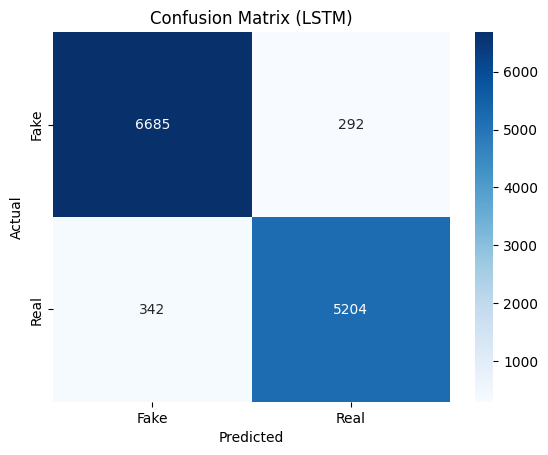

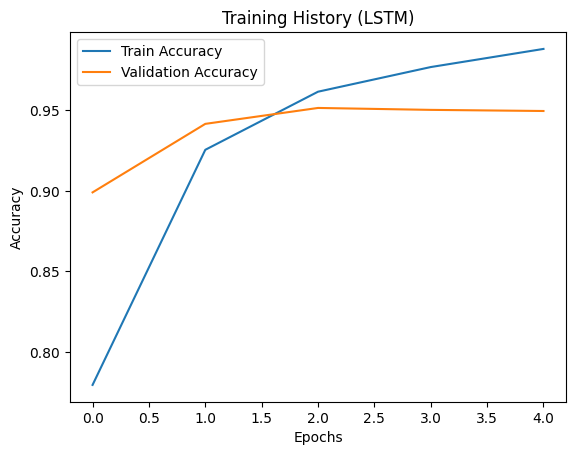

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenize text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['cleaned_text'])

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_df['cleaned_text'])
X_test = tokenizer.texts_to_sequences(test_df['cleaned_text'])

# Pad sequences to fixed length
max_len = 200  # Adjust based on your data
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

# Labels
y_train = train_df['label']
y_test = test_df['label']

# Build LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LSTM)')
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training History (LSTM)')
plt.legend()
plt.show()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Loss: 0.12130564713919924
Epoch 2, Loss: 0.05079473479343721
Epoch 3, Loss: 0.027075147231245933
Test Accuracy: 0.9734


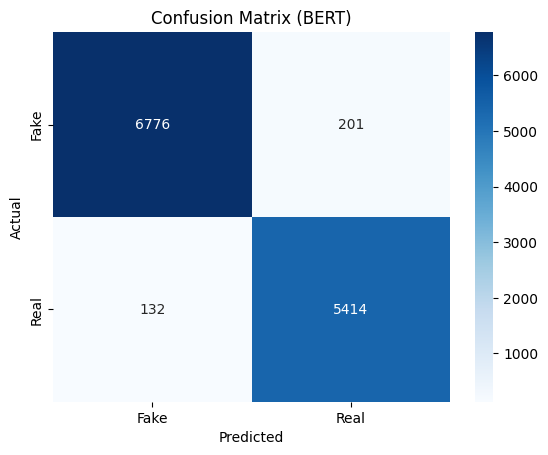

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenize data
def encode_texts(texts, labels, max_len=128):
    encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=max_len, return_tensors='pt')
    return encodings['input_ids'], encodings['attention_mask'], torch.tensor(labels.tolist())

# Prepare datasets
train_input_ids, train_attention_mask, train_labels = encode_texts(train_df['cleaned_text'], train_df['label'])
test_input_ids, test_attention_mask, test_labels = encode_texts(test_df['cleaned_text'], test_df['label'])

train_dataset = TensorDataset(train_input_ids, train_attention_mask, train_labels)
test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Set up optimizer and device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")

# Evaluation
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(labels.cpu().numpy())

# Metrics
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (BERT)')
plt.show()

In [ ]:
# Truth Score (1-100 scale) based on confidence for 'Real' label (1)
def calculate_truth_score(logits):
    probs = torch.nn.functional.softmax(logits, dim=-1)
    return (probs[:, 1] * 100).cpu().numpy()

truth_scores = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask = batch[0].to(device), batch[1].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        scores = calculate_truth_score(outputs.logits)
        truth_scores.extend(scores)

# Show some results
for i in range(5):
    print(f"\nArticle {i + 1}:")
    print(f"Title: {test_df.iloc[i]['title']}")
    print(f"Predicted Truth Score: {truth_scores[i]:.2f}/100")

# Save the trained model
model.save_pretrained('fine-tuned-bert')
tokenizer.save_pretrained('fine-tuned-bert')

# Zip and download the trained model
!zip -r fine-tuned-bert.zip fine-tuned-bert
from google.colab import files
files.download('fine-tuned-bert.zip')


Article 1:
Title: Senator Franken to resign on Thursday: Minnesota Public Radio
Predicted Truth Score: 0.01/100

Article 2:
Title:  ‘No Real Logic’: French Translators Having A VERY Hard Time With Trump’s Limited Vocabulary
Predicted Truth Score: 99.89/100

Article 3:
Title: Shaken by Sex Scandal, Oakland Police to Get New Leader, Again - The New York Times
Predicted Truth Score: 0.03/100

Article 4:
Title:  Watch This Bible-Waving ‘Christian’ Lady March Through Target Ranting About Devil Rape (VIDEO)
Predicted Truth Score: 99.99/100

Article 5:
Title: Japan, US, S.Korea Deputy FMs to Discuss N.Korea Nuclear Issue Thursday
Predicted Truth Score: 90.87/100
  adding: fine-tuned-bert/ (stored 0%)
  adding: fine-tuned-bert/special_tokens_map.json (deflated 42%)
  adding: fine-tuned-bert/config.json (deflated 49%)
  adding: fine-tuned-bert/tokenizer_config.json (deflated 75%)
  adding: fine-tuned-bert/model.safetensors (deflated 7%)
  adding: fine-tuned-bert/vocab.txt (deflated 53%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>